In [0]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import pickle

# import other packages needed for the project below this line

In [2]:
# IMPOTRTANT: set the path where the data files are relative to the Notebook file. 
# You can change the variable pathname below to anything that suits you, For example,
# if your Notebook file is to be run on Google Colab, then you will need to set up
# this variable properly, e.g., 
#       pathname = os.path.join('My Drive', 'CITS5508').
#
# Before submitting your Notebook file to cssubmit, ensure that you change
# this variable back to '.'

# pathname = '.'
# pathname = r'D:\JupyterNotebook\Notebook\Lab05\cifar-10-batches-py'
import os
from google.colab import drive
drive.mount('/content/gdrive')
print(os.listdir('.'))
pathname = '/content/gdrive/My Drive/Colab Notebooks/cifar-10-batches-py'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
['.config', 'gdrive', 'sample_data']


%%bash
tar -xvf /content/sample_data/cifar-10-python.tar.gz

In [0]:
# function for loading the data_batch_file
def load_pickle_file(filename, path='.'):
    '''
    This function reads the given pickle file and returns a dictionary object.
    '''
    with open(os.path.join(path,filename), 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict  


def load_training(filename_prefix, N_batches, path='.'):
    '''
    This function reads the 5 data batches and returns the X_train and y_train numpy arrays.
    To save memory space, X_train is set to 'float32' (single precision floating point number).
    If this causes an issue, it can be set to 'float64'. y_train is set to uint8. This is
    the same data type as the MNIST dataset, so it should be fine.
    '''
    batch_no = range(1,N_batches+1)  # the batch numbers start at 1
    # Read in the data_batch_ files
    batches = [load_pickle_file(os.path.join(path,filename_prefix+str(b))) for b in batch_no]

    # variable batches is a list containing 5 elements, each of which is a dictionary object

    # compose our X_train and y_train
    # according to the download site, the training set should have 50,000 instances. We caldulate
    # the length from the dictionary that we read in anyway.
    batch_sizes = [len(batches[i][b'labels']) for i in range(N_batches)]
    train_set_size = np.sum(batch_sizes)
    
    X_train = np.zeros((train_set_size, width, height, Nchannels), dtype='float32')
    y_train = np.zeros(train_set_size).astype('uint8')
    loc = 0
    for i in range(N_batches):
        X_train[loc:(loc+batch_sizes[i]),:,:,:] = np.swapaxes(np.swapaxes(
            np.reshape(batches[i][b'data'], (-1,Nchannels,width,height)), 1, 3), 1, 2) / 255.0
        y_train[loc:(loc+batch_sizes[i])] = batches[i][b'labels']
        loc += batch_sizes[i]
    return X_train, y_train


def load_testing(filename, path='.'):
    '''
    This function reads the test_batch and returns X_test and y_test.
    To save memory space, X_test is set to 'float32' (single precision floating point number).
    If this causes an issue, it can be set to 'float64'. y_test is set to uint8. This is
    the same data type as the MNIST dataset, so it should be fine.
    '''
    # now read test_batch and construct the test set
    test_dict = load_pickle_file(filename, path=path)
    
    X_test = np.swapaxes(np.swapaxes(
        np.reshape(test_dict[b'data'], (-1,Nchannels,width,height)), 1, 3), 1, 2) / 255.0
    X_test = X_test.astype('float32')
    y_test = np.array(test_dict[b'labels'], dtype='uint8')
    return X_test, y_test

In [3]:
c=3
def test(a,b):
    print(a,b,c)
test(1,2)

1 2 3


In [6]:
print(os.listdir('/content/gdrive/My Drive/Colab Notebooks/cifar-10-batches-py'))

['test_batch', 'data_batch_3', 'data_batch_2', 'data_batch_5', 'data_batch_1', 'data_batch_4', 'batches.meta', 'readme.html']


In [4]:
# According to the download site, the training set is split into five batches stored in 5 files,
# each colour image has dimension equal to 32 x 32 x 3, and there are 10 classes.
width, height, Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

N_batches = 5  
train_filename_prefix = 'data_batch_'
test_filename = 'test_batch'

X_train, y_train = load_training(train_filename_prefix, N_batches, path=pathname)
X_test, y_test = load_testing(test_filename, path=pathname)

train_set_size = X_train.shape[0]
test_set_size = X_test.shape[0]
print('Number of training instances:', train_set_size)
print('Number of test instances:    ', test_set_size)

Number of training instances: 50000
Number of test instances:     10000


In [7]:
len(X_train[0]), len(X_train[0][0]), X_train[0][0].shape

(32, 32, (32, 3))

The first 20 instances of the CIFAR-10 training set


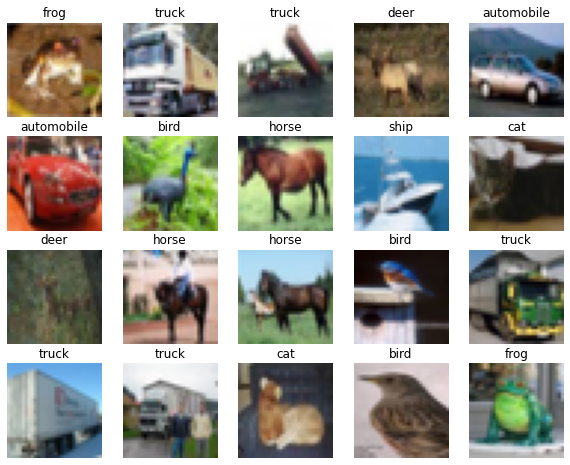

In [5]:
print('The first 20 instances of the CIFAR-10 training set')
plt.figure(figsize=(10, 8))
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    ax.set_title(class_names[y_train[i]])
plt.show()

In [6]:
# X_train, y_train, X_test, and y_test are all numpy arrays
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_train.shape = (50000, 32, 32, 3) data type: float32
y_train.shape = (50000,) data type: uint8
X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


In [0]:
## split the training set into a small validation set
X_valid, X_training = X_train[:5000], X_train[5000:]
y_valid, y_training = y_train[:5000], y_train[5000:]

In [8]:
## get the shape of training set, valid set and test set
print('X_valid.shape =', X_valid.shape, 'data type:', X_valid.dtype)
print('X_training.shape =', X_training.shape, 'data type:', X_training.dtype)
print('y_valid.shape =', y_valid.shape, 'data type:', y_valid.dtype)
print('y_training.shape =', y_training.shape, 'data type:', y_training.dtype)

X_valid.shape = (5000, 32, 32, 3) data type: float32
X_training.shape = (45000, 32, 32, 3) data type: float32
y_valid.shape = (5000,) data type: uint8
y_training.shape = (45000,) data type: uint8


**- MLP with two hidden layers**
1. weight initialisation is random_uniform
2. learning rate is 0.01
3. early stopping (monitor="val_loss", patience=10, restore_best_weights=True)
4. the accuracy is 0.4699999988079071


1. weight initialisation is random_uniform
2. learning rate is 0.0001
3. early stopping (monitor="val_loss", patience=10, restore_best_weights=True)
4. the accuracy is 0.24040000140666962



1. weight initialisation is zero
2. learning rate is 0.01
3. early stopping (monitor="val_loss", patience=10, restore_best_weights=True)
4. the accuracy is 0.10000000149011612

1. weight initialisation is random_uniform
2. learning rate is 0.01
3. early stopping (monitor="val_loss", patience=10, restore_best_weights=False)
4. the accuracy is 0.4505000114440918


In [0]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import initializers
#initializer = tf.keras.initializers.Zeros()
initializer = "random_normal"

model = keras.models.Sequential()
# the first layer of neural network
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
# the first hidden layer
model.add(keras.layers.Dense(300, activation="relu",
                             kernel_initializer=initializer,
                             bias_initializer="zeros"))
# the second hidden layer
model.add(keras.layers.Dense(100, activation="relu",
                             kernel_initializer=initializer,
                             bias_initializer="zeros"))
# output layer
model.add(keras.layers.Dense(10, activation="softmax",
                             kernel_initializer=initializer,
                             bias_initializer="zeros"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape

(3072, 300)

In [12]:
weights

array([[-0.07313369, -0.03271155, -0.0171366 , ...,  0.05753837,
         0.03959218, -0.03625818],
       [-0.01025034, -0.00700501,  0.1195726 , ...,  0.04362154,
         0.05079016,  0.06760398],
       [ 0.03962956,  0.01374839,  0.02746306, ..., -0.07120673,
         0.007414  ,  0.01885948],
       ...,
       [ 0.04207876, -0.07222745, -0.03810714, ...,  0.04042138,
         0.05127481, -0.03201138],
       [-0.01122556, -0.09328531,  0.00338026, ...,  0.03754212,
        -0.03465022,  0.0539883 ],
       [ 0.06153904,  0.01415678, -0.01891497, ...,  0.03882381,
         0.03028869, -0.00553574]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=5, 
                                                  restore_best_weights=True)
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=sgd,
             metrics=["accuracy"])

In [14]:
# Training and evaluating the model
history = model.fit(X_training, y_training, 
                    epochs=10, validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9459 - accuracy: 0.3040 - val_loss: 2.0839 - val_accuracy: 0.2562
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7565 - accuracy: 0.3767 - val_loss: 1.7487 - val_accuracy: 0.3686
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6721 - accuracy: 0.4070 - val_loss: 1.8004 - val_accuracy: 0.3494
Epoch 4/10
1407/1407 [==============================] - 4s 2ms/step - loss: 1.6124 - accuracy: 0.4302 - val_loss: 1.7009 - val_accuracy: 0.3856
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5656 - accuracy: 0.4459 - val_loss: 1.5625 - val_accuracy: 0.4426
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5273 - accuracy: 0.4587 - val_loss: 1.5463 - val_accuracy: 0.4496
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4940 - accuracy: 0.4704 - val_loss: 1.7061 - val_accuracy:

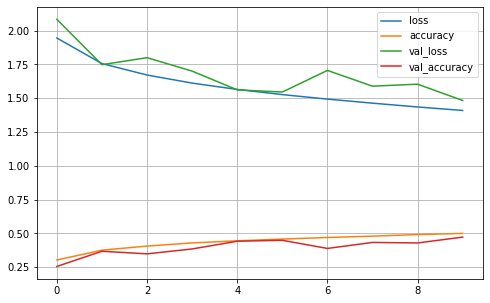

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim()
plt.show()

In [16]:
y_pred = model.predict_classes(X_test)
y_pred.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(10000,)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[457,  19,  30,  10,  32,  41,  34,  14, 322,  41],
       [ 22, 443,   4,  18,  11,  31,  18,  20, 225, 208],
       [ 94,  17, 216,  63, 171, 141, 160,  37,  75,  26],
       [ 30,  16,  46, 202,  51, 315, 167,  26,  85,  62],
       [ 51,   7,  83,  35, 426,  84, 157,  51,  82,  24],
       [ 13,   9,  53, 114,  69, 458, 118,  44,  87,  35],
       [  5,   9,  29,  39, 114,  95, 622,  15,  45,  27],
       [ 40,  10,  44,  40,  99, 130,  61, 420,  68,  88],
       [ 48,  22,   4,  10,  19,  23,   7,   7, 819,  41],
       [ 21,  97,   5,  14,  12,  29,  30,  24, 206, 562]])

In [18]:
score_test = model.evaluate(X_test, y_test)
print("the accuracy is %s" % score_test[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.4918 - accuracy: 0.4625
the accuracy is 0.4625000059604645


The first 10 instances of the CIFAR-10 test set


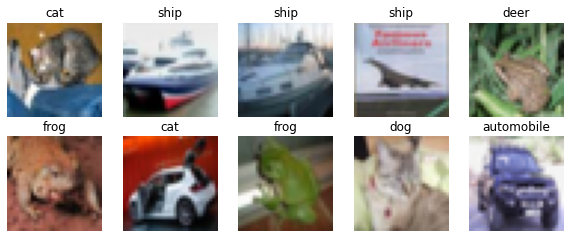

In [31]:
# display some of the images to ensure that we have read in the data correctly
print('The first 10 instances of the CIFAR-10 test set')
plt.figure(figsize=(10, 8))
for i in range(10):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    ax.set_title(class_names[y_pred[i]])
plt.show()

**- CNN**
1. kernel_size (3,3)
2. number of kernels 32, 64, 128, 256
3. dropout rate is 0.2
4. activation function is relu and softmax
5. the accuracy is 0.7164999842643738

1. kernel_size (7,7) -- slower and total time is 270s
accuracy is higher than validation, there is overfit
2. number of kernels 32, 64, 128, 256
3. dropout rate is 0.2
4. activation function is relu and softmax
5. the score is 0.7286999821662903


1. kernel_size (3,3) -- total time is 210s
2. number of kernels 64, 128, 256, 512
3. dropout rate is 0.2
4. activation function is relu and softmax
5. the score is 0.777899980545044 

1. kernel_size (3,3) -- total time is 210s
2. number of kernels 64, 128, 256, 512
3. dropout rate is 0.5
4. activation function is relu and softmax
5. the score is 0.7692000269889832 


1. kernel_size (3,3) -- total time is 150s -- high accuracy and higest one is 94% overfitting
2. number of kernels 64, 128, 256, 512
3. dropout rate is 0.2
4. activation function is elu and softmax
5. the score is 0.7336000204086304

In [0]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=(3,3), activation='relu', padding="SAME")

In [0]:
model_cnn = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=(3,3), input_shape=[32,32,3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    DefaultConv2D(filters=512),
    DefaultConv2D(filters=512),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [58]:
RMS = keras.optimizers.RMSprop(learning_rate=0.0001)
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=RMS, 
              metrics=["accuracy"])
history_cnn = model_cnn.fit(X_training, y_training, 
                     epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7665 - accuracy: 0.3456 - val_loss: 1.4763 - val_accuracy: 0.4666
Epoch 2/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3319 - accuracy: 0.5167 - val_loss: 1.2375 - val_accuracy: 0.5446
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.0992 - accuracy: 0.6117 - val_loss: 1.1169 - val_accuracy: 0.6000
Epoch 4/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9343 - accuracy: 0.6731 - val_loss: 0.9574 - val_accuracy: 0.6684
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.7989 - accuracy: 0.7212 - val_loss: 0.9418 - val_accuracy: 0.6740
Epoch 6/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.6972 - accuracy: 0.7613 - val_loss: 1.2963 - val_accuracy: 0.6054
Epoch 7/10
1407/1407 [==============================] - 14s 10ms/step - loss: 0.5976 - accuracy: 0.7961 - val_loss: 0.7205 -

In [59]:
score_cnn = model_cnn.evaluate(X_test, y_test)
print("the score is %s " % score_cnn[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7389 - accuracy: 0.7779
the score is 0.777899980545044 


In [63]:
# serialize model to json
from keras.models import model_from_json
model_json = model_cnn.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/model_cnn.json", "w") as json_file:
  json_file.write(model_json)
# serialize model to HDF5
model_cnn.save_weights("/content/gdrive/My Drive/Colab Notebooks/model_cnn.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


In [0]:
# load json and create model
with open('/content/gdrive/My Drive/Colab Notebooks/model_cnn.json', 'r') as f:
  loaded_model = tf.keras.models.model_from_json(f.read())


In [20]:
loaded_model.load_weights("/content/gdrive/My Drive/Colab Notebooks/model_cnn.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
y_pred_cnn = loaded_model.predict_classes(X_test)
#y_pred_cnn = model_cnn.predict_classes(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cnn)

array([[806,  13,  26,  20,  23,   4,   4,  26,  39,  39],
       [ 14, 871,   1,   9,   2,   3,   6,   5,  11,  78],
       [ 50,   2, 571,  79, 125,  68,  38,  54,   4,   9],
       [ 12,   7,  13, 640,  64, 162,  26,  62,   5,   9],
       [  9,   2,  20,  42, 797,  30,  10,  84,   3,   3],
       [  6,   4,   8, 133,  46, 722,   7,  67,   0,   7],
       [  4,   2,  15,  89,  74,  32, 769,   7,   4,   4],
       [  4,   1,   5,  18,  45,  31,   1, 888,   0,   7],
       [ 52,  26,   7,  27,   8,   6,   3,   9, 839,  23],
       [ 20,  41,   5,  21,   2,   6,   5,  14,  10, 876]])

In [62]:
m = tf.keras.metrics.Accuracy()
m.update_state(y_pred_cnn, y_test)
m.result().numpy()

0.7779

The first 10 instances of the CIFAR-10 test set


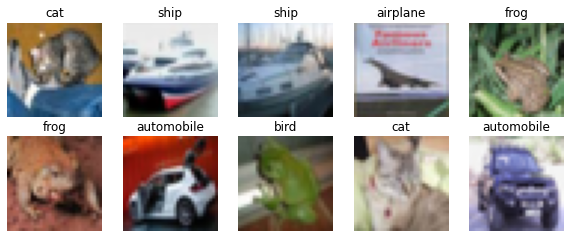

In [35]:
# display some of the images to ensure that we have read in the data correctly
print('The first 10 instances of the CIFAR-10 test set')
plt.figure(figsize=(10, 8))
for i in range(10):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    ax.set_title(class_names[y_pred_cnn[i]])
plt.show()

In [34]:
class_names[y_pred_cnn[9]]

'automobile'